In [232]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import csv
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

In [233]:
class LinearRegression() :
      
    def __init__(self, learning_rate, iterations) :
        self.learning_rate = learning_rate
        self.iterations = iterations
        
              
    def fit(self, X, Y) :
        self.sampleNumb, self.featuresNumb = X.shape 
        self.weight = np.zeros(self.featuresNumb)  
        self.bias = 0  
        self.X = X 
        self.Y = Y
                  
        for i in range(self.iterations) :             
            self.weights()             
        return self
      
    def weights(self) :
        Y_pred = self.predict(self.X)
        weightGradient = - (2 * (self.X.T).dot(self.Y - Y_pred )) / self.sampleNumb
        biasGradient = - 2 * np.sum(self.Y - Y_pred) / self.sampleNumb
        self.weight = self.weight - self.learning_rate * weightGradient
        self.bias = self.bias - self.learning_rate * biasGradient
        return self
      
    def predict(self, X) :
        return X.dot(self.weight) + self.bias

In [234]:
modelEncoder = LabelEncoder()
transmissionEncoder = LabelEncoder()
fuelTypeEncoder = LabelEncoder()
scaler = MinMaxScaler()

def dataset(brand):
    file = pd.read_csv(brand, quotechar='"', skipinitialspace=True)

    modelEncoder.fit(file["model"])
    file["model"] = modelEncoder.transform(file["model"])
    
    transmissionEncoder.fit(file["transmission"])
    file["transmission"] = transmissionEncoder.transform(file["transmission"])
    
    fuelTypeEncoder.fit(file["fuelType"])
    file["fuelType"] = fuelTypeEncoder.transform(file["fuelType"])

    file = file.head(5000) # Limits dataset size

    X = file.drop(columns = ['price'])
    Y = file.price
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 601)
    
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    print(list(fuelTypeEncoder.classes_))

    return  X_train, X_test, Y_train, Y_test

In [235]:
X_train, X_test, Y_train, Y_test = dataset("UKUsedCarDataSet/audi.csv") # Use Audi dataset as default for KNN analysis

['Diesel', 'Hybrid', 'Petrol']


Predicted values  [21629.96 21094.6  28545.97 ... 18951.76 23764.78 27666.94]
Real values       2056    17498
4972    25990
751     26495
2124    14791
1562    26888
        ...  
16      15700
4291    55900
1660    14298
1825    17695
3889    23499
Name: price, Length: 1250, dtype: int64


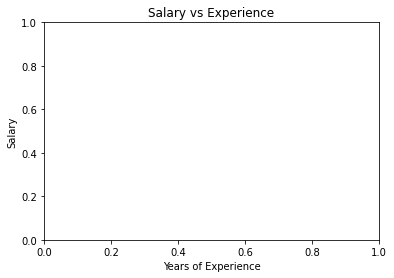

In [236]:
model = LinearRegression( iterations = 1000, learning_rate = 0.01 )

model.fit( X_train, Y_train )
Y_pred = model.predict( X_test )

print( "Predicted values ", np.round( Y_pred, 2 ) ) 
print( "Real values      ", Y_test )
# print( "Trained W        ", round( model.weight[0], 2 ) )
# print( "Trained b        ", round( model.b, 2 ) )

# Visualization on test set 

# plt.scatter( X_test, Y_test, color = 'blue' )
# plt.plot( X_test, Y_pred, color = 'orange' )
plt.title( 'Salary vs Experience' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )

plt.show()

In [237]:
def rmse(test, pred):
    print("RMSE: ")
    MSE = np.square(np.subtract(test, pred)).mean()
    return sqrt(MSE)

In [245]:
def evaluation(train, test, yTrain, yTest):    
    y_pred =  model.predict(X_test)
    error = rmse(yTest, y_pred) 
    print('The RMSE value is:', error)
    # for i in range(len(y_pred)):
    #     print("\nOriginal value:", yTest.iloc[i], "vs the predicted value:", y_pred[i])
    #     print("The difference is:", yTest.iloc[i] - y_pred[i])

    
    
    file2 = pd.read_csv("UKUsedCarDataSet/audi.csv", quotechar='"', skipinitialspace=True)
    mean= np.mean(file2["price"])

    print("R VALUE:", 1 - (error/mean))
    
evaluation(X_train, X_test, Y_train, Y_test)

#rmse: 5125.277827632167
#rmse with 5000: 7038.9346097461


RMSE: 
The RMSE value is: 7038.9346097461
R VALUE: 0.6925784410431951


ValueError: x and y must be the same size

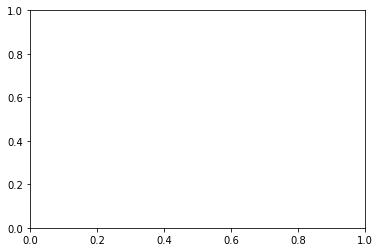

In [239]:
plt.scatter( X_test, Y_test, color = 'blue' )
      
plt.plot( X_test, Y_pred, color = 'orange' )
    
plt.title( 'Salary vs Experience' )
    
plt.xlabel( 'Years of Experience' )
    
plt.ylabel( 'Salary' )
    
plt.show()